In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

#Find the releative path of Lib folder
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

import PyBEM2D as BEMpy

[Mesh] Genetrated...
[Mesh] Discontinous Element used
[Mesh] Number of boundary elements:4(Total) 4(Edge) 0(Trace)
[Mesh] Number of Nodes:12(Total) 12(Edge) 0(Trace) 0(Source)
[Boundary Condition] BCs set up
[Boundary Condition] Dirichlet BC @ [(3, 100)]
[Boundary Condition] Neumann BC @ [(1, -50)]


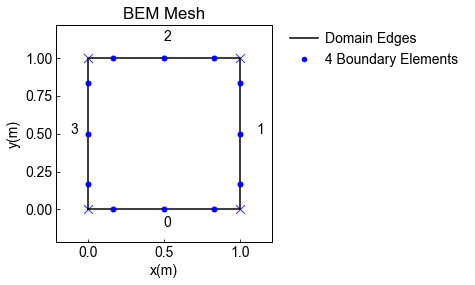

In [17]:
BEM_Case1=BEMpy.BEM2D()

#1.Build Mesh-#Anti-clock wise for internal domain
Boundary_vert=[(0.0, 0.0), (1.0, 0.0),(1.0,1.0),(0.0,1.0)]  #bottom
element_esize=1.0

BEM_Case1.set_Mesh(Boundary_vert,[],[],element_esize,[],Type="Quad")

#2.Set Boundary condition
bc0=[(3,100)]
bc1=[(1,-50)]
BEM_Case1.set_BoundaryCondition(DirichletBC=bc0,NeumannBC=bc1)#,RobinBC=bc1)
#BEM_Case1.set_BoundaryCondition(DirichletBC=bc0+bc1)#,RobinBC=bc1)

#bc0=[(3,100),(1,10)]
#BEM_Case1.set_BoundaryCondition(DirichletBC=bc0)#,RobinBC=bc1)

#3.Set Domain Properties - permeability tensor
k11=0.3
k12=0
k22=0.3
k_tensor=[k11,k12,k22]
BEM_Case1.SetProps(k_tensor,h=0.5,miu=0.2)

#Check Mesh
BEM_Case1.plot_Mesh()
#Check Node,BC if necessary
#BEM_Case1.Mesh.print_debug()

[Solution] #DOFs= 12
[Visulization] Plotting Solution


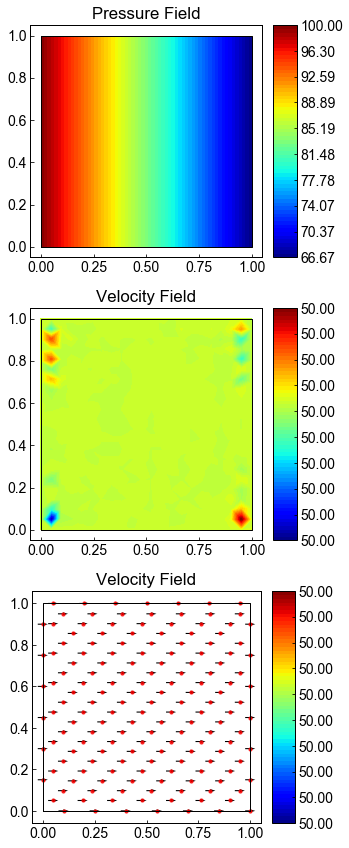

[Mesh] State
Number of boundary elements:4
Edge Num.:4
# Neumann-1   Dirichlet-0
(E)Pts	P	Q	U	V
(1)1	94.44	0.00	-50.00	0.00
(1)2	83.33	0.00	-50.00	0.00
(1)3	72.22	0.00	-50.00	-0.00
(2)4	66.67	-50.00	-50.00	-0.00
(2)5	66.67	-50.00	-50.00	-0.00
(2)6	66.67	-50.00	-50.00	-0.00
(3)7	72.22	0.00	-50.00	0.00
(3)8	83.33	0.00	-50.00	-0.00
(3)9	94.44	0.00	-50.00	-0.00
(4)10	100.00	50.00	-50.00	-0.00
(4)11	100.00	50.00	-50.00	-0.00
(4)12	100.00	50.00	-50.00	-0.00
Unit Boundary Flux -5.684341886080802e-14
Trace Num.:0
Unit Trace Flux 0.0
Source Num.:0
Mass Balance= -5.684341886080802e-14 5.684341886080802e-14


In [18]:
puv=BEM_Case1.Solve()
xx=BEM_Case1.PostProcess.plot_Solution()
BEM_Case1.PostProcess.print_Solution()

In [10]:
BEM_Case1.get_Solution((0.5001,0.0))

(54.99100000000001, 45.0, -1.065294651159121e-14)

In [10]:
BEM_Case1.get_Solution((0.0,0.05))

(99.99999999999997, 49.99999999999953, -1.9745538143095024e-13)

## Solution Verification

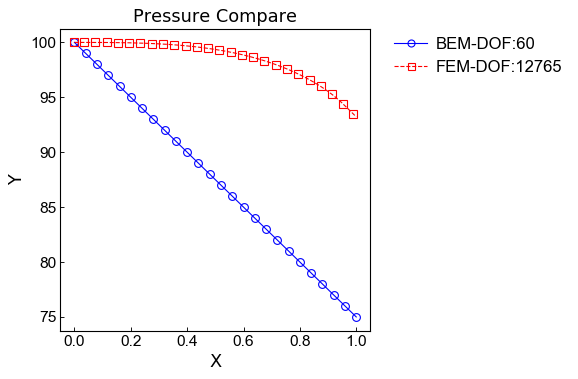

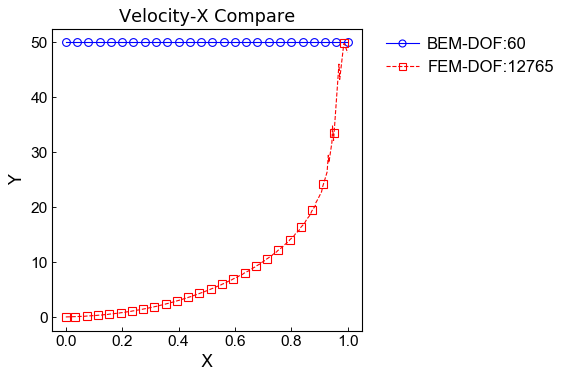

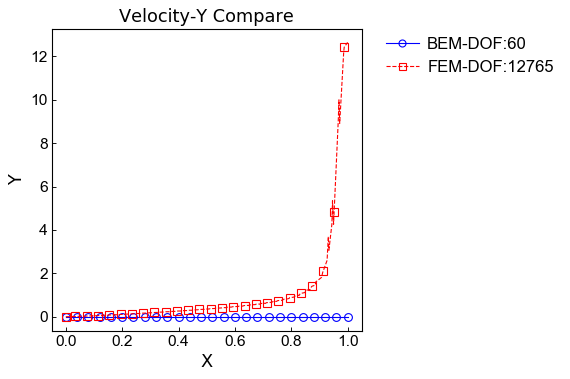

In [12]:
import numpy as np
Pts1,Pts2=(0.0,0.98),(1.0,0.98)

#BEM Solution
PUV=BEM_Case1.PostProcess.plot_Solution_overline(Pts1,Pts2,plot=False)
#Get Comsol Data
P = np.genfromtxt('.\Verification\SimpleDomain_p.csv', comments='%',delimiter=',')
U = np.genfromtxt('.\Verification\SimpleDomain_u.csv', comments='%',delimiter=',')
V = np.genfromtxt('.\Verification\SimpleDomain_v.csv', comments='%',delimiter=',')

#Compare Pressure
DataNames=['BEM-DOF:60','FEM-DOF:12765']
DataSetX=[PUV[:,0],P[:,0]]

DataSetY=[PUV[:,1],P[:,1]]
BEM_Case1.PostProcess.Compare_LinePlots(DataSetX,DataSetY,DataNames,'Pressure Compare')

DataSetY=[PUV[:,2],U[:,1]]
BEM_Case1.PostProcess.Compare_LinePlots(DataSetX,DataSetY,DataNames,'Velocity-X Compare')

DataSetY=[PUV[:,3],V[:,1]]
BEM_Case1.PostProcess.Compare_LinePlots(DataSetX,DataSetY,DataNames,'Velocity-Y Compare')

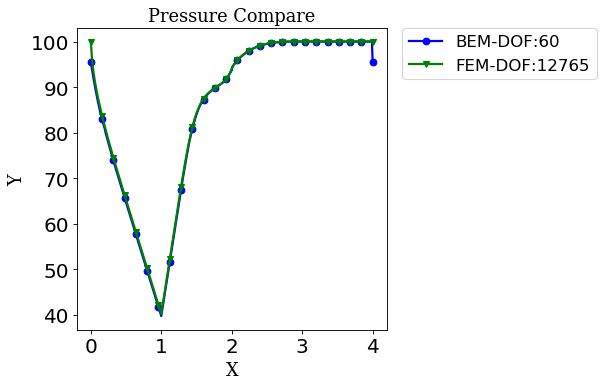

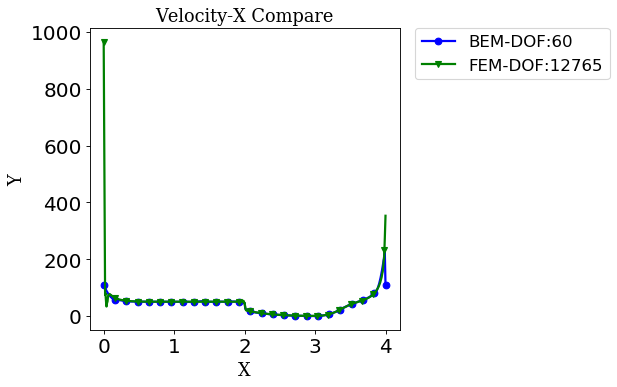

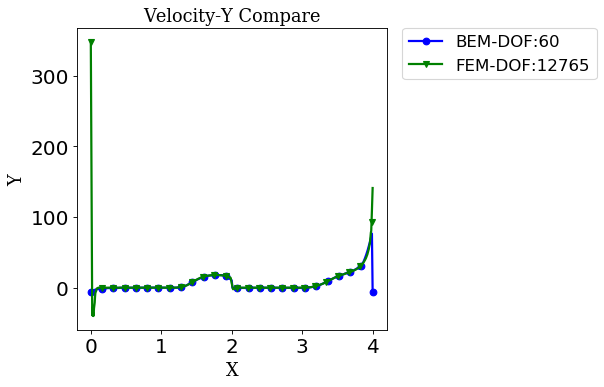

In [62]:
#BEM Solution
X1,PUV=BEM_Case1.PostProcess.plot_SolutionBD(plot=False)
#Get Comsol Data
P = np.genfromtxt('.\Verification\SimpleDomain_BD_p.csv', comments='%',delimiter=',')
U = np.genfromtxt('.\Verification\SimpleDomain_BD_u.csv', comments='%',delimiter=',')
V = np.genfromtxt('.\Verification\SimpleDomain_BD_v.csv', comments='%',delimiter=',')

#Compare Pressure
DataNames=['BEM-DOF:60','FEM-DOF:12765']

DataSetX=[X1,P[:,0]]
DataSetY=[PUV[:,0],P[:,1]]
BEM_Case1.PostProcess.Compare_LinePlots(DataSetX,DataSetY,DataNames,'Pressure Compare')

DataSetX=[X1,U[:,0]]
DataSetY=[PUV[:,1],U[:,1]]
BEM_Case1.PostProcess.Compare_LinePlots(DataSetX,DataSetY,DataNames,'Velocity-X Compare')

DataSetX=[X1,V[:,0]]
DataSetY=[PUV[:,2],V[:,1]]
BEM_Case1.PostProcess.Compare_LinePlots(DataSetX,DataSetY,DataNames,'Velocity-Y Compare')